In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
#Get the data

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised= True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAB6X6E/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAB6X6E/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAB6X6E/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = (train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)))

In [6]:
test_dataset = (test_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset)))

In [7]:
print(train_dataset)

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>


In [8]:
print(test_dataset)

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>


In [9]:
model = tf.keras.Sequential([
                                    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                                    tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(64, activation= 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 32s 83ms/step - loss: 0.4335 - accuracy: 0.7914 - val_loss: 0.3001 - val_accuracy: 0.8796
Epoch 2/10
391/391 [==============================] - 21s 54ms/step - loss: 0.2184 - accuracy: 0.9166 - val_loss: 0.3132 - val_accuracy: 0.8751
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1646 - accuracy: 0.9418 - val_loss: 0.3441 - val_accuracy: 0.8680
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1362 - accuracy: 0.9514 - val_loss: 0.3530 - val_accuracy: 0.8695
Epoch 5/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1064 - accuracy: 0.9630 - val_loss: 0.4377 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 18s 45ms/step - loss: 0.0865 - accuracy: 0.9705 - val_loss: 0.5193 - val_accuracy: 0.8600
Epoch 7/10
391/391 [==============================] - 17s 44ms/step - loss: 0.0747 - accuracy: 0.9754 - val_loss: 0.5813 - val_accuracy:

In [14]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

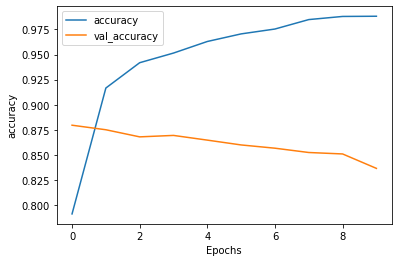

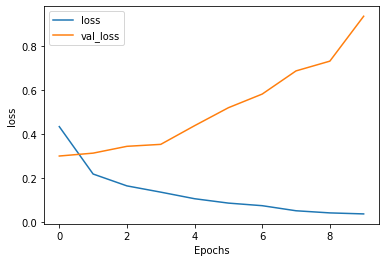

In [17]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

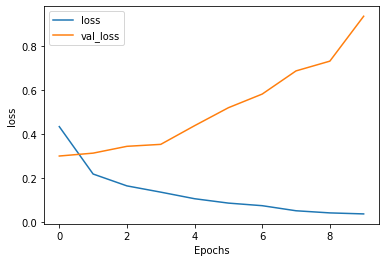

In [16]:
plot_graph(history, 'loss')